In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc


In [2]:
# load data
data = pd.read_csv('data/combined-data.csv')
data.head()

id_student code_module code_presentation  attempted_weight  adjusted_mark   
0        6516         AAA             2014J             100.0      48.055203  \
1        8462         DDD             2013J              40.0            NaN   
2        8462         DDD             2014J              50.0            NaN   
3       11391         AAA             2013J             100.0      64.006980   
4       23629         BBB             2013B              25.0      13.803681   

   mark gender               region imd_band age_band  num_of_prev_attempts   
0  31.8      M             Scotland   80-90%     55<=                     0  \
1   NaN      M        London Region   30-40%     55<=                     0   
2   NaN      M        London Region   30-40%     55<=                     1   
3  41.2      M  East Anglian Region  90-100%     55<=                     0   
4   8.3      F  East Anglian Region   20-30%     0-35                     2   

   studied_credits disability final_result             edu  
0               60          N         Pass    HE or higher  
1               90          N    Withdrawn    HE or higher  
2               60          N    Withdrawn    HE or higher  
3              240          N         Pass    HE or higher  
4               60          N         Fail  Level or lower

# Pre-process data
1. change string to integer
2. drop NAN 

In [3]:
# process data, change string to integer
# change age_band
data["age_band"] = data["age_band"].map({"0-35":1, "35-55":2, "55<=":3})

# preprocess "edu" column
data["edu"] = data["edu"] .map({"Level or lower":0, "HE or higher":1})

# change imd_band 
data["imd_band"] = data["imd_band"].map({"01/10/2020":'', "0-10%":0, "10-20%":1, "20-30%":2, "30-40%":3, "40-50%":4, "50-60%":5, "60-70%":6, "70-80%":7, "80-90%":8, "90-100%":9})

# drop null 
data.dropna(inplace=True)
data.shape

(18187, 15)

<Axes: >

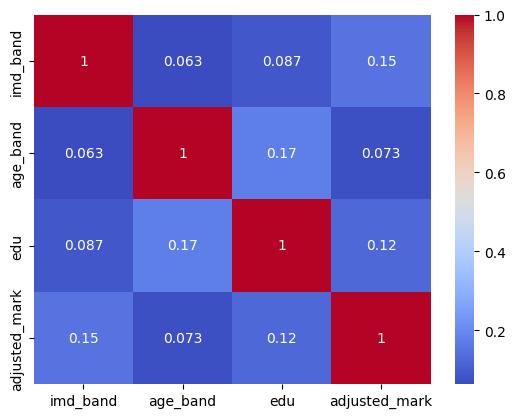

In [4]:
# create correlation matrix
columns=['imd_band', 'age_band', 'edu','adjusted_mark']
corr_matrix = data[columns].corr()

# plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# K-Means clustering
using the Elbow Technique to find the optimal value of k, which is 3.

In [9]:
# preprocessing using min max scaler
#  'imd_band', 'age_band', 'edu','adjusted_mark'

scaler= MinMaxScaler()

scaler.fit(data[['imd_band']])
data['imd_band'] = scaler.transform(data[['imd_band']])

scaler.fit(data[['age_band']])
data['age_band'] = scaler.transform(data[['age_band']])

scaler.fit(data[['edu']])
data['edu'] = scaler.transform(data[['edu']])

scaler.fit(data[['adjusted_mark']])
data['adjusted_mark'] = scaler.transform(data[['adjusted_mark']])

In [10]:
# extract the four features, 'imd_band', 'age_band', 'edu','adjusted_mark'
extracted_data = data.iloc[:, [4, 8, 9, 14]]
# X.shape
extracted_data.head()

adjusted_mark  imd_band  age_band  edu
0       0.480552  0.888889       1.0  1.0
3       0.640070  1.000000       1.0  1.0
4       0.138037  0.222222       0.0  0.0
5       0.733000  0.555556       0.0  0.0
6       0.903408  0.555556       0.0  0.0

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

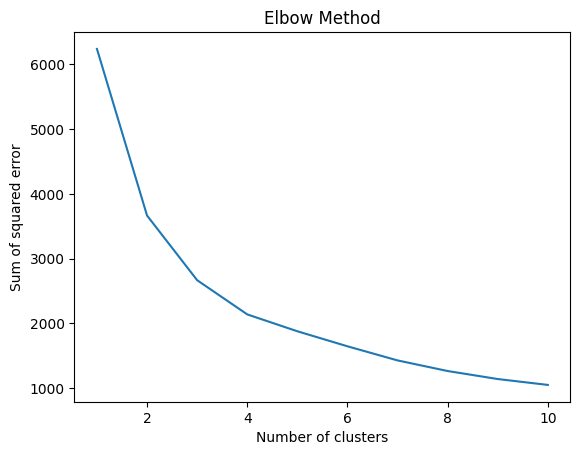

In [11]:
# find the optimal value of k, using the Elbow Technique
see = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,init = 'k-means++')
    kmeans.fit(extracted_data)
    see.append(kmeans.inertia_)
plt.plot(range(1, 11), see)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared error')
plt.show()
# plt.savefig('image/elbow.png')

In [12]:
km = KMeans(n_clusters=3,init = 'k-means++')
y_predicted = km.fit_predict(extracted_data)
y_predicted

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 1, ..., 0, 0, 2], dtype=int32)

In [13]:
data['cluster'] = y_predicted
data.head()

id_student code_module code_presentation  attempted_weight  adjusted_mark   
0        6516         AAA             2014J             100.0       0.480552  \
3       11391         AAA             2013J             100.0       0.640070   
4       23629         BBB             2013B              25.0       0.138037   
5       23698         CCC             2014J             150.0       0.733000   
6       23798         BBB             2013J             100.0       0.903408   

   mark gender               region  imd_band  age_band  num_of_prev_attempts   
0  31.8      M             Scotland  0.888889       1.0                     0  \
3  41.2      M  East Anglian Region  1.000000       1.0                     0   
4   8.3      F  East Anglian Region  0.222222       0.0                     2   
5  55.0      F  East Anglian Region  0.555556       0.0                     0   
6  44.6      M                Wales  0.555556       0.0                     0   

   studied_credits disability final_result  edu  cluster  
0               60          N         Pass  1.0        2  
3              240          N         Pass  1.0        2  
4               60          N         Fail  0.0        1  
5              120          N  Distinction  0.0        0  
6               60          N  Distinction  0.0        0

In [14]:
km.cluster_centers_

array([[ 5.59616192e-01,  7.73535779e-01,  1.51724592e-01,
        -4.71844785e-16],
       [ 4.68736877e-01,  2.68978059e-01,  1.29619852e-01,
        -5.82867088e-16],
       [ 5.91681569e-01,  5.91818684e-01,  2.53399668e-01,
         1.00000000e+00]])

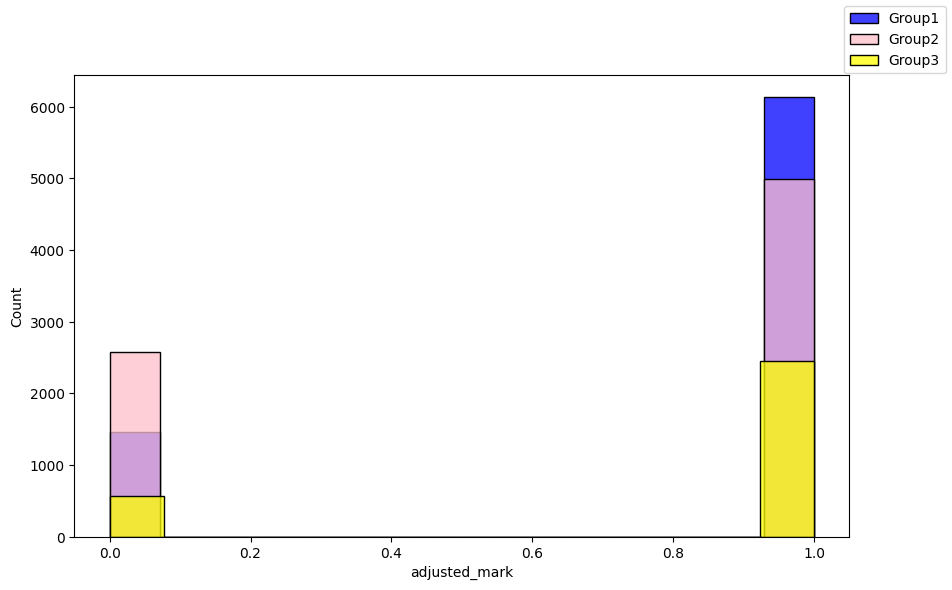

In [72]:
df1 = data[data.cluster==0]
df2 = data[data.cluster==1]
df3 = data[data.cluster==2]
fig = plt.figure(figsize=(10,6))
sns.distplot(df1.adjusted_mark, color='blue')
sns.distplot(df2.adjusted_mark, color='pink')
sns.distplot(df3.adjusted_mark, color='yellow')

fig.legend(labels=['Group1','Group2','Group3'])
plt.show()
# plt.savefig('image/groupclustering.png')

In [16]:
#preprocessing train data for Apriori
# 'imd_band'>=0.5 is 1 otherwise 0, means IMD>=50% is 1, 'age_band'>=0.5 is 1 otherwise 0 means >=35 is 1, 
def encode_units(x):
    if x >=0.5:
        return 1
    else:
        return 0
# 'adjusted_mark'>=0.4 is 1 means pass, otherwise 0
def encode_units_2(x):
    if x >=0.4:
        return 1
    else:
        return 0

data['imd_band'] = data['imd_band'].map(encode_units)
data['age_band'] = data['age_band'].map(encode_units)
data['adjusted_mark'] = data['adjusted_mark'].map(encode_units_2)
data['edu'] = data['edu'].map(encode_units)

data[['imd_band', 'age_band', 'edu','adjusted_mark']]

imd_band  age_band  edu  adjusted_mark
0             1         1    1              1
3             1         1    1              1
4             0         0    0              0
5             1         0    0              1
6             1         0    0              1
...         ...       ...  ...            ...
25837         1         0    0              1
25838         1         0    0              1
25840         1         0    0              1
25841         1         1    0              0
25842         0         0    1              1

[18187 rows x 4 columns]

In [17]:
# dividing data to train and test
train_data, test_data = np.split(data.sample(frac=1, random_state=1729), [int(0.8 * len(data))])
print(train_data.shape, test_data.shape)

(14549, 16) (3638, 16)


In [18]:
# dividing train_data to 3 groups, using Apriori to find frequent itemsetss
# Apriori: if A happen, the chance of result B happen
# Apply Apriori on each cluster separately
train_df1 = train_data[train_data.cluster==0]
train_df2 = train_data[train_data.cluster==1]
train_df3 = train_data[train_data.cluster==2]

print(train_df1.shape,train_df2.shape,train_df3.shape)

(6056, 16) (6091, 16) (2402, 16)


In [19]:
# Define Apriori parameters
min_support = 0.03

# Run Apriori on the first cluster
freq_items1 = apriori(train_df1[['imd_band', 'age_band', 'edu','adjusted_mark']], min_support=min_support, use_colnames=True)
freq_items1['length'] = freq_items1['itemsets'].apply(lambda x: len(x))
# print("frequent itemset 1 is: ")
freq_items1

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support                             itemsets  length
0  0.995542                           (imd_band)       1
1  0.296896                           (age_band)       1
2  0.806308                      (adjusted_mark)       1
3  0.293758                 (age_band, imd_band)       2
4  0.801849            (adjusted_mark, imd_band)       2
5  0.246863            (age_band, adjusted_mark)       2
6  0.243725  (age_band, imd_band, adjusted_mark)       3

In [20]:
rules1 = association_rules(freq_items1, metric="lift", min_threshold=1)
rules1

antecedents                consequents  antecedent support   
0                 (age_band)            (adjusted_mark)            0.296896  \
1            (adjusted_mark)                 (age_band)            0.806308   
2       (age_band, imd_band)            (adjusted_mark)            0.293758   
3  (adjusted_mark, imd_band)                 (age_band)            0.801849   
4                 (age_band)  (adjusted_mark, imd_band)            0.296896   
5            (adjusted_mark)       (age_band, imd_band)            0.806308   

   consequent support   support  confidence      lift  leverage  conviction   
0            0.806308  0.246863    0.831479  1.031218  0.007473    1.149368  \
1            0.296896  0.246863    0.306164  1.031218  0.007473    1.013358   
2            0.806308  0.243725    0.829680  1.028986  0.006866    1.137223   
3            0.296896  0.243725    0.303954  1.023773  0.005660    1.010140   
4            0.801849  0.243725    0.820912  1.023773  0.005660    1.106443   
5            0.293758  0.243725    0.302273  1.028986  0.006866    1.012204   

   zhangs_metric  
0       0.043057  
1       0.156296  
2       0.039887  
3       0.117191  
4       0.033027  
5       0.145435

In [21]:
# Run Apriori on the second cluster
freq_items2 = apriori(train_df2[['imd_band', 'age_band', 'edu','adjusted_mark']], min_support=min_support, use_colnames=True)
freq_items2['length'] = freq_items2['itemsets'].apply(lambda x: len(x))
# print("frequent itemset 2 is: ")
freq_items2

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support                   itemsets  length
0  0.052044                 (imd_band)       1
1  0.258578                 (age_band)       1
2  0.665572            (adjusted_mark)       1
3  0.186997  (age_band, adjusted_mark)       2

In [22]:
rules2 = association_rules(freq_items2, metric="lift", min_threshold=1)
print("rule 2 is :")
rules2

rule 2 is :


antecedents      consequents  antecedent support  consequent support   
0       (age_band)  (adjusted_mark)            0.258578            0.665572  \
1  (adjusted_mark)       (age_band)            0.665572            0.258578   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.186997    0.723175  1.086546  0.014895    1.208082       0.107432  
1  0.186997    0.280957  1.086546  0.014895    1.031123       0.238175

In [23]:
freq_items3 = apriori(train_df3[['imd_band', 'age_band', 'edu','adjusted_mark']], min_support=min_support, use_colnames=True)
freq_items3['length'] = freq_items3['itemsets'].apply(lambda x: len(x))
# print("frequent itemset 3 is: ")
freq_items3

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support                                  itemsets  length
0   0.594921                                (imd_band)       1
1   0.468360                                (age_band)       1
2   1.000000                                     (edu)       1
3   0.818068                           (adjusted_mark)       1
4   0.296003                      (age_band, imd_band)       2
5   0.594921                           (edu, imd_band)       2
6   0.503331                 (adjusted_mark, imd_band)       2
7   0.468360                           (age_band, edu)       2
8   0.385928                 (age_band, adjusted_mark)       2
9   0.818068                      (adjusted_mark, edu)       2
10  0.296003                 (age_band, edu, imd_band)       3
11  0.255204       (age_band, imd_band, adjusted_mark)       3
12  0.503331            (adjusted_mark, edu, imd_band)       3
13  0.385928            (age_band, edu, adjusted_mark)       3
14  0.255204  (age_band, edu, imd_band, adjusted_mark)       4

In [24]:
rules3 = association_rules(freq_items3, metric="lift", min_threshold=1)
rules3

antecedents                          consequents   
0                            (age_band)                           (imd_band)  \
1                            (imd_band)                           (age_band)   
2                                 (edu)                           (imd_band)   
3                            (imd_band)                                (edu)   
4                       (adjusted_mark)                           (imd_band)   
5                            (imd_band)                      (adjusted_mark)   
6                            (age_band)                                (edu)   
7                                 (edu)                           (age_band)   
8                            (age_band)                      (adjusted_mark)   
9                       (adjusted_mark)                           (age_band)   
10                      (adjusted_mark)                                (edu)   
11                                (edu)                      (adjusted_mark)   
12                      (age_band, edu)                           (imd_band)   
13                 (age_band, imd_band)                                (edu)   
14                      (edu, imd_band)                           (age_band)   
15                           (age_band)                      (edu, imd_band)   
16                                (edu)                 (age_band, imd_band)   
17                           (imd_band)                      (age_band, edu)   
18                 (age_band, imd_band)                      (adjusted_mark)   
19            (age_band, adjusted_mark)                           (imd_band)   
20            (adjusted_mark, imd_band)                           (age_band)   
21                           (age_band)            (adjusted_mark, imd_band)   
22                           (imd_band)            (age_band, adjusted_mark)   
23                      (adjusted_mark)                 (age_band, imd_band)   
24                 (adjusted_mark, edu)                           (imd_band)   
25            (adjusted_mark, imd_band)                                (edu)   
26                      (edu, imd_band)                      (adjusted_mark)   
27                      (adjusted_mark)                      (edu, imd_band)   
28                                (edu)            (adjusted_mark, imd_band)   
29                           (imd_band)                 (adjusted_mark, edu)   
30                      (age_band, edu)                      (adjusted_mark)   
31            (age_band, adjusted_mark)                                (edu)   
32                 (adjusted_mark, edu)                           (age_band)   
33                           (age_band)                 (adjusted_mark, edu)   
34                                (edu)            (age_band, adjusted_mark)   
35                      (adjusted_mark)                      (age_band, edu)   
36            (age_band, edu, imd_band)                      (adjusted_mark)   
37       (age_band, edu, adjusted_mark)                           (imd_band)   
38  (age_band, imd_band, adjusted_mark)                                (edu)   
39       (adjusted_mark, edu, imd_band)                           (age_band)   
40                      (age_band, edu)            (adjusted_mark, imd_band)   
41                 (age_band, imd_band)                 (adjusted_mark, edu)   
42            (age_band, adjusted_mark)                      (edu, imd_band)   
43                      (edu, imd_band)            (age_band, adjusted_mark)   
44                 (adjusted_mark, edu)                 (age_band, imd_band)   
45            (adjusted_mark, imd_band)                      (age_band, edu)   
46                           (age_band)       (adjusted_mark, edu, imd_band)   
47                                (edu)  (age_band, imd_band, adjusted_mark)   
48                           (imd_band)       (age_band, edu, adjusted_mark)   
49                      (adj

In [25]:
def get_itemset(onerowdata):
    itemset=set()
    if onerowdata['imd_band'] == 1:
        itemset.add('imd_band')
    if onerowdata['age_band'] == 1:
        itemset.add('age_band')
    if onerowdata['edu'] == 1:
        itemset.add('edu')
    return itemset

def get_result(itemset):
    new_data=itemset
    # Apply the association rules to the new data
    for _, rule in rules3.iterrows():
        antecedent = set(rule['antecedents'])
        consequent = set(rule['consequents'])
        confidence = rule['confidence']
        support=rule['support']
        
        if len(antecedent) == len(new_data):
            if (support>=0.5) and (antecedent==new_data) and ('adjusted_mark' in consequent) and (confidence>=0.5):
                print(f"Instance {new_data} predicts {consequent} confidence is {confidence}")
                return 1
    return 0

In [26]:
# train data
train_group3=train_data[train_data.cluster==2]
train_group3

id_student code_module code_presentation  attempted_weight   
16201      614117         BBB             2014B             100.0  \
25395     2599784         BBB             2014J             100.0   
24841     2451523         CCC             2014J              84.0   
1130       164935         DDD             2013J             200.0   
1108       160945         GGG             2014B             100.0   
...           ...         ...               ...               ...   
520         98313         BBB             2013B             100.0   
20551      654539         CCC             2014J             150.0   
1418       197595         BBB             2013B             100.0   
24535     2341830         DDD             2014J             200.0   
11548      576791         FFF             2013J             100.0   

       adjusted_mark  mark gender                region  imd_band  age_band   
16201              1  30.5      F   East Anglian Region         0         0  \
25395              1  21.5      F     South West Region         0         0   
24841              1  38.8      F     South East Region         0         1   
1130               1  74.8      M  North Western Region         1         0   
1108               1  42.3      F   East Anglian Region         0         0   
...              ...   ...    ...                   ...       ...       ...   
520                1  39.4      F              Scotland         0         1   
20551              1  66.7      F              Scotland         1         0   
1418               1  37.6      F         London Region         0         1   
24535              1  67.3      F              Scotland         0         0   
11548              1  45.8      M          North Region         0         0   

       num_of_prev_attempts  studied_credits disability final_result  edu   
16201                     0               60          N         Pass    1  \
25395                     0               60          N         Pass    1   
24841                     0               60          N  Distinction    1   
1130                      0               60          N  Distinction    1   
1108                      0               30          N         Pass    1   
...                     ...              ...        ...          ...  ...   
520                       0               60          N         Pass    1   
20551                     0               90          N  Distinction    1   
1418                      0               60          N         Pass    1   
24535                     1               90          N  Distinction    1   
11548                     0              120          N  Distinction    1   

       cluster  
16201        2  
25395        2  
24841        2  
1130         2  
1108         2  
...        ...  
520          2  
20551        2  
1418         2  
24535        2  
11548        2  

[2402 rows x 16 columns]

In [29]:
# applying rules3 to trained data group 3, cluster=2
#  applying associated rules to test_data group3, cluster=2
for index, row in train_group3.iterrows():
    # print(index,row)
    itemset=get_itemset(row)
    result = get_result(itemset)
    train_group3.loc[index,"apriori"]=result
    
train_group3

Instance {'edu'} predicts {'adjusted_mark'} confidence is 0.8180682764363031
Instance {'edu'} predicts {'adjusted_mark'} confidence is 0.8180682764363031
Instance {'edu', 'imd_band'} predicts {'adjusted_mark'} confidence is 0.8460461861441566
Instance {'edu'} predicts {'adjusted_mark'} confidence is 0.8180682764363031
Instance {'edu', 'imd_band'} predicts {'adjusted_mark'} confidence is 0.8460461861441566
Instance {'edu'} predicts {'adjusted_mark'} confidence is 0.8180682764363031
Instance {'edu'} predicts {'adjusted_mark'} confidence is 0.8180682764363031
Instance {'edu', 'imd_band'} predicts {'adjusted_mark'} confidence is 0.8460461861441566
Instance {'edu'} predicts {'adjusted_mark'} confidence is 0.8180682764363031
Instance {'edu', 'imd_band'} predicts {'adjusted_mark'} confidence is 0.8460461861441566
Instance {'edu'} predicts {'adjusted_mark'} confidence is 0.8180682764363031
Instance {'edu'} predicts {'adjusted_mark'} confidence is 0.8180682764363031
Instance {'edu', 'imd_band'}

/var/folders/mm/wmbw6bv54s75hqq51vn_kjvm0000gn/T/ipykernel_9388/2668862953.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_group3.loc[index,16]=result


id_student code_module code_presentation  attempted_weight   
16201      614117         BBB             2014B             100.0  \
25395     2599784         BBB             2014J             100.0   
24841     2451523         CCC             2014J              84.0   
1130       164935         DDD             2013J             200.0   
1108       160945         GGG             2014B             100.0   
...           ...         ...               ...               ...   
520         98313         BBB             2013B             100.0   
20551      654539         CCC             2014J             150.0   
1418       197595         BBB             2013B             100.0   
24535     2341830         DDD             2014J             200.0   
11548      576791         FFF             2013J             100.0   

       adjusted_mark  mark gender                region  imd_band  age_band   
16201              1  30.5      F   East Anglian Region         0         0  \
25395              1  21.5      F     South West Region         0         0   
24841              1  38.8      F     South East Region         0         1   
1130               1  74.8      M  North Western Region         1         0   
1108               1  42.3      F   East Anglian Region         0         0   
...              ...   ...    ...                   ...       ...       ...   
520                1  39.4      F              Scotland         0         1   
20551              1  66.7      F              Scotland         1         0   
1418               1  37.6      F         London Region         0         1   
24535              1  67.3      F              Scotland         0         0   
11548              1  45.8      M          North Region         0         0   

       num_of_prev_attempts  studied_credits disability final_result  edu   
16201                     0               60          N         Pass    1  \
25395                     0               60          N         Pass    1   
24841                     0               60          N  Distinction    1   
1130                      0               60          N  Distinction    1   
1108                      0               30          N         Pass    1   
...                     ...              ...        ...          ...  ...   
520                       0               60          N         Pass    1   
20551                     0               90          N  Distinction    1   
1418                      0               60          N         Pass    1   
24535                     1               90          N  Distinction    1   
11548                     0              120          N  Distinction    1   

       cluster  apriori   16  
16201        2      1.0  1.0  
25395        2      1.0  1.0  
24841        2      0.0  0.0  
1130         2      1.0  1.0  
1108         2      1.0  1.0  
...        ...      ...  ...  
520          2      0.0  0.0  
20551        2      1.0  1.0  
1418         2      0.0  0.0  
24535        2      1.0  1.0  
11548        2      1.0  1.0  

[2402 rows x 18 columns]

train_joined.drop(columns=train_joined.columns[-1],  axis=1,  inplace=True)

In [42]:
train_joined=pd.merge(train_data,train_group3,on=['id_student','code_module','code_presentation'],how='left', suffixes=('', '_y'))
train_joined.drop(train_joined.filter(regex='_y$').columns, axis=1, inplace=True)
train_joined

id_student code_module code_presentation  attempted_weight   
0          109772         GGG             2014B             100.0  \
1          128889         BBB             2013J             100.0   
2          614117         BBB             2014B             100.0   
3          943374         CCC             2014J             150.0   
4          527306         DDD             2013B             197.0   
...           ...         ...               ...               ...   
14544      647395         BBB             2014J             100.0   
14545     2341830         DDD             2014J             200.0   
14546     2632491         DDD             2013B              25.5   
14547      576791         FFF             2013J             100.0   
14548      617331         CCC             2014B               2.0   

       adjusted_mark  mark gender                region  imd_band  age_band   
0                  1  37.5      F          South Region         0         0  \
1                  1  42.0      F          South Region         1         1   
2                  1  30.5      F   East Anglian Region         0         0   
3                  0  35.7      M              Scotland         1         1   
4                  1  53.8      F  North Western Region         1         0   
...              ...   ...    ...                   ...       ...       ...   
14544              1  43.0      F  East Midlands Region         0         1   
14545              1  67.3      F              Scotland         0         0   
14546              0   6.9      M                 Wales         1         0   
14547              1  45.8      M          North Region         0         0   
14548              0   0.6      M          South Region         0         0   

       num_of_prev_attempts  studied_credits disability final_result  edu   
0                         0               30          N         Pass    0  \
1                         1              120          N         Pass    0   
2                         0               60          N         Pass    1   
3                         0               30          N         Pass    0   
4                         0               60          N         Pass    0   
...                     ...              ...        ...          ...  ...   
14544                     0               60          N  Distinction    0   
14545                     1               90          N  Distinction    1   
14546                     0               60          N         Fail    0   
14547                     0              120          N  Distinction    1   
14548                     0               60          N         Fail    0   

       cluster  apriori   16  
0            1      NaN  NaN  
1            0      NaN  NaN  
2            2      1.0  1.0  
3            0      NaN  NaN  
4            0      NaN  NaN  
...        ...      ...  ...  
14544        1      NaN  NaN  
14545        2      1.0  1.0  
14546        1      NaN  NaN  
14547        2      1.0  1.0  
14548        1      NaN  NaN  

[14549 rows x 18 columns]

In [44]:
train_group3.drop(columns=train_group3.columns[-1], axis=1, inplace=True)
train_group3

/var/folders/mm/wmbw6bv54s75hqq51vn_kjvm0000gn/T/ipykernel_9388/1230574557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_group3.drop(columns=train_group3.columns[-1],  axis=1,  inplace=True)


id_student code_module code_presentation  attempted_weight   
16201      614117         BBB             2014B             100.0  \
25395     2599784         BBB             2014J             100.0   
24841     2451523         CCC             2014J              84.0   
1130       164935         DDD             2013J             200.0   
1108       160945         GGG             2014B             100.0   
...           ...         ...               ...               ...   
520         98313         BBB             2013B             100.0   
20551      654539         CCC             2014J             150.0   
1418       197595         BBB             2013B             100.0   
24535     2341830         DDD             2014J             200.0   
11548      576791         FFF             2013J             100.0   

       adjusted_mark  mark gender                region  imd_band  age_band   
16201              1  30.5      F   East Anglian Region         0         0  \
25395              1  21.5      F     South West Region         0         0   
24841              1  38.8      F     South East Region         0         1   
1130               1  74.8      M  North Western Region         1         0   
1108               1  42.3      F   East Anglian Region         0         0   
...              ...   ...    ...                   ...       ...       ...   
520                1  39.4      F              Scotland         0         1   
20551              1  66.7      F              Scotland         1         0   
1418               1  37.6      F         London Region         0         1   
24535              1  67.3      F              Scotland         0         0   
11548              1  45.8      M          North Region         0         0   

       num_of_prev_attempts  studied_credits disability final_result  edu   
16201                     0               60          N         Pass    1  \
25395                     0               60          N         Pass    1   
24841                     0               60          N  Distinction    1   
1130                      0               60          N  Distinction    1   
1108                      0               30          N         Pass    1   
...                     ...              ...        ...          ...  ...   
520                       0               60          N         Pass    1   
20551                     0               90          N  Distinction    1   
1418                      0               60          N         Pass    1   
24535                     1               90          N  Distinction    1   
11548                     0              120          N  Distinction    1   

       cluster  apriori  
16201        2      1.0  
25395        2      1.0  
24841        2      0.0  
1130         2      1.0  
1108         2      1.0  
...        ...      ...  
520          2      0.0  
20551        2      1.0  
1418         2      0.0  
24535        2      1.0  
11548        2      1.0  

[2402 rows x 17 columns]

# Test, applying associated rules

In [33]:
# test data
test_group3=test_data[test_data.cluster==2]
test_group3

id_student code_module code_presentation  attempted_weight   
15724      610234         CCC             2014J             150.0  \
11531      576600         BBB             2013J             100.0   
25453     2613219         EEE             2014B             100.0   
19870      648244         FFF             2014J              25.0   
15899      611402         EEE             2013J             100.0   
...           ...         ...               ...               ...   
18823      634111         FFF             2014B             100.0   
2171       283133         EEE             2013J             100.0   
21411      680894         EEE             2014J             100.0   
22274      690016         EEE             2014J             100.0   
4770       441385         EEE             2014J              72.0   

       adjusted_mark  mark gender                region  imd_band  age_band   
15724              1  64.8      M              Scotland         1         0  \
11531              1  34.6      F         London Region         0         1   
25453              0  33.1      M              Scotland         1         1   
19870              0   7.2      F                 Wales         0         0   
15899              1  44.8      M          South Region         1         1   
...              ...   ...    ...                   ...       ...       ...   
18823              1  47.4      M     South East Region         1         0   
2171               1  46.5      M  East Midlands Region         1         0   
21411              1  37.2      M              Scotland         0         0   
22274              1  43.2      M      Yorkshire Region         1         0   
4770               0  30.0      M              Scotland         1         1   

       num_of_prev_attempts  studied_credits disability final_result  edu   
15724                     1               60          N  Distinction    1  \
11531                     0               60          N         Pass    1   
25453                     0               30          N         Fail    1   
19870                     0              120          N         Fail    1   
15899                     0               60          N         Pass    1   
...                     ...              ...        ...          ...  ...   
18823                     0               60          N         Pass    1   
2171                      0              120          N  Distinction    1   
21411                     0               30          N         Pass    1   
22274                     0               60          N         Pass    1   
4770                      0               90          N         Fail    1   

       cluster  
15724        2  
11531        2  
25453        2  
19870        2  
15899        2  
...        ...  
18823        2  
2171         2  
21411        2  
22274        2  
4770         2  

[613 rows x 16 columns]

In [34]:
#  applying associated rules to test_data group3, cluster=2
for index, row in test_group3.iterrows():
    # print(index,row)
    itemset=get_itemset(row)
    result = get_result(itemset)
    test_group3.loc[index,'apriori']=result
    
test_group3

Instance {'edu', 'imd_band'} predicts {'adjusted_mark'} confidence is 0.8460461861441566
Instance {'edu'} predicts {'adjusted_mark'} confidence is 0.8180682764363031
Instance {'edu', 'imd_band'} predicts {'adjusted_mark'} confidence is 0.8460461861441566
Instance {'edu'} predicts {'adjusted_mark'} confidence is 0.8180682764363031
Instance {'edu'} predicts {'adjusted_mark'} confidence is 0.8180682764363031
Instance {'edu', 'imd_band'} predicts {'adjusted_mark'} confidence is 0.8460461861441566
Instance {'edu'} predicts {'adjusted_mark'} confidence is 0.8180682764363031
Instance {'edu', 'imd_band'} predicts {'adjusted_mark'} confidence is 0.8460461861441566
Instance {'edu'} predicts {'adjusted_mark'} confidence is 0.8180682764363031
Instance {'edu', 'imd_band'} predicts {'adjusted_mark'} confidence is 0.8460461861441566
Instance {'edu', 'imd_band'} predicts {'adjusted_mark'} confidence is 0.8460461861441566
Instance {'edu', 'imd_band'} predicts {'adjusted_mark'} confidence is 0.846046186

/var/folders/mm/wmbw6bv54s75hqq51vn_kjvm0000gn/T/ipykernel_9388/1150343143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_group3.loc[index,'apriori']=result


id_student code_module code_presentation  attempted_weight   
15724      610234         CCC             2014J             150.0  \
11531      576600         BBB             2013J             100.0   
25453     2613219         EEE             2014B             100.0   
19870      648244         FFF             2014J              25.0   
15899      611402         EEE             2013J             100.0   
...           ...         ...               ...               ...   
18823      634111         FFF             2014B             100.0   
2171       283133         EEE             2013J             100.0   
21411      680894         EEE             2014J             100.0   
22274      690016         EEE             2014J             100.0   
4770       441385         EEE             2014J              72.0   

       adjusted_mark  mark gender                region  imd_band  age_band   
15724              1  64.8      M              Scotland         1         0  \
11531              1  34.6      F         London Region         0         1   
25453              0  33.1      M              Scotland         1         1   
19870              0   7.2      F                 Wales         0         0   
15899              1  44.8      M          South Region         1         1   
...              ...   ...    ...                   ...       ...       ...   
18823              1  47.4      M     South East Region         1         0   
2171               1  46.5      M  East Midlands Region         1         0   
21411              1  37.2      M              Scotland         0         0   
22274              1  43.2      M      Yorkshire Region         1         0   
4770               0  30.0      M              Scotland         1         1   

       num_of_prev_attempts  studied_credits disability final_result  edu   
15724                     1               60          N  Distinction    1  \
11531                     0               60          N         Pass    1   
25453                     0               30          N         Fail    1   
19870                     0              120          N         Fail    1   
15899                     0               60          N         Pass    1   
...                     ...              ...        ...          ...  ...   
18823                     0               60          N         Pass    1   
2171                      0              120          N  Distinction    1   
21411                     0               30          N         Pass    1   
22274                     0               60          N         Pass    1   
4770                      0               90          N         Fail    1   

       cluster  apriori  
15724        2      1.0  
11531        2      0.0  
25453        2      0.0  
19870        2      1.0  
15899        2      0.0  
...        ...      ...  
18823        2      1.0  
2171         2      1.0  
21411        2      1.0  
22274        2      1.0  
4770         2      0.0  

[613 rows x 17 columns]

In [40]:
test_joined=pd.merge(test_data,test_group3,on=['id_student','code_module','code_presentation'],how='left', suffixes=('', '_y'))
test_joined.drop(test_joined.filter(regex='_y$').columns, axis=1, inplace=True)
test_joined

id_student code_module code_presentation  attempted_weight   
0         560643         GGG             2014J              33.3  \
1         245217         CCC             2014J             120.0   
2         336213         DDD             2014J             200.0   
3         574819         DDD             2013J             200.0   
4         681746         DDD             2014J             200.0   
...          ...         ...               ...               ...   
3633      635124         FFF             2014B              25.0   
3634      618338         GGG             2014B             100.0   
3635      248994         DDD             2013B             200.0   
3636      425332         FFF             2014B              25.0   
3637      298476         BBB             2013B             100.0   

      adjusted_mark  mark gender                region  imd_band  age_band   
0                 0   8.3      F   East Anglian Region         0         1  \
1                 0  30.1      M  East Midlands Region         1         0   
2                 1  65.0      M                 Wales         0         0   
3                 1  52.6      F     South West Region         0         0   
4                 1  74.0      F     South East Region         0         0   
...             ...   ...    ...                   ...       ...       ...   
3633              0   8.1      M     South East Region         1         0   
3634              1  35.8      M         London Region         1         0   
3635              1  83.9      F                 Wales         0         0   
3636              0  11.5      M     South East Region         0         1   
3637              1  35.3      F          North Region         1         0   

      num_of_prev_attempts  studied_credits disability final_result  edu   
0                        0               30          Y         Fail    0  \
1                        1              250          N         Fail    0   
2                        0               60          N  Distinction    0   
3                        0              120          N  Distinction    0   
4                        0               60          N  Distinction    0   
...                    ...              ...        ...          ...  ...   
3633                     0               60          N         Fail    0   
3634                     0               30          N         Pass    0   
3635                     0               60          N  Distinction    0   
3636                     1               60          Y         Fail    0   
3637                     2              130          N         Pass    0   

      cluster  apriori  
0           1      NaN  
1           1      NaN  
2           1      NaN  
3           1      NaN  
4           1      NaN  
...       ...      ...  
3633        1      NaN  
3634        0      NaN  
3635        1      NaN  
3636        1      NaN  
3637        0      NaN  

[3638 rows x 17 columns]

In [41]:
test_joined[test_joined['apriori']==1]

id_student code_module code_presentation  attempted_weight   
5         610234         CCC             2014J             150.0  \
24        648244         FFF             2014J              25.0   
58        154540         BBB             2013B             100.0   
69        622900         DDD             2014B              40.0   
75        532020         CCC             2014B             150.0   
...          ...         ...               ...               ...   
3606      685627         GGG             2014J             100.0   
3611      634111         FFF             2014B             100.0   
3612      283133         EEE             2013J             100.0   
3613      680894         EEE             2014J             100.0   
3615      690016         EEE             2014J             100.0   

      adjusted_mark  mark gender                region  imd_band  age_band   
5                 1  64.8      M              Scotland         1         0  \
24                0   7.2      F                 Wales         0         0   
58                1  39.0      F  North Western Region         1         0   
69                0  13.2      F         London Region         0         0   
75                1  47.3      M              Scotland         0         0   
...             ...   ...    ...                   ...       ...       ...   
3606              1  36.3      F              Scotland         0         0   
3611              1  47.4      M     South East Region         1         0   
3612              1  46.5      M  East Midlands Region         1         0   
3613              1  37.2      M              Scotland         0         0   
3615              1  43.2      M      Yorkshire Region         1         0   

      num_of_prev_attempts  studied_credits disability final_result  edu   
5                        1               60          N  Distinction    1  \
24                       0              120          N         Fail    1   
58                       0               60          N         Pass    1   
69                       0               60          N         Fail    1   
75                       0               90          N  Distinction    1   
...                    ...              ...        ...          ...  ...   
3606                     0               30          N         Pass    1   
3611                     0               60          N         Pass    1   
3612                     0              120          N  Distinction    1   
3613                     0               30          N         Pass    1   
3615                     0               60          N         Pass    1   

      cluster  apriori  
5           2      1.0  
24          2      1.0  
58          2      1.0  
69          2      1.0  
75          2      1.0  
...       ...      ...  
3606        2      1.0  
3611        2      1.0  
3612        2      1.0  
3613        2      1.0  
3615        2      1.0  

[311 rows x 17 columns]

In [45]:
# combine test and train dataframes
final_data=pd.concat([train_joined,test_joined])
final_data.shape

(18187, 17)

In [46]:
pd.DataFrame(final_data).to_csv('final_data.csv')

In [47]:
# cluster==2 depends on apriori
final_data['predict'] = final_data['apriori']
#cluster==0 more likely to success, predict=1
final_data.loc[final_data.cluster==0,'predict']=1
#cluster==1 more likely to fail, predict=0
final_data.loc[final_data.cluster==1,'predict']=0

In [48]:
pd.DataFrame(final_data).to_csv('final_result.csv')

# Testing report

In [49]:
y_test=final_data['adjusted_mark']
y_pred_test=final_data['predict']
X_test=final_data
test_acc = accuracy_score(y_test,y_pred_test)
test_rep = classification_report(y_test,y_pred_test)

print()
print("---- METRICS RESULTS FOR TESTING DATA ----")
print()
print("Total Rows are: ", X_test.shape[0])
print('[TESTING] Model Accuracy is: ', test_acc)
print('[TESTING] Testing Report: ')
print(test_rep)


---- METRICS RESULTS FOR TESTING DATA ----

Total Rows are:  18187
[TESTING] Model Accuracy is:  0.5630395337328862
[TESTING] Testing Report: 
              precision    recall  f1-score   support

           0       0.31      0.61      0.42      4606
           1       0.81      0.55      0.65     13581

    accuracy                           0.56     18187
   macro avg       0.56      0.58      0.53     18187
weighted avg       0.68      0.56      0.59     18187



# Random forecast


In [50]:
df = pd.read_csv('data/combined-data.csv')

In [ ]:
# preprocess "edu" column
df["edu"] = df["edu"] .map({"Level or lower":0, "HE or higher":1})

# change code_module 
df["code_module"] = df["code_module"].map({"AAA":1, "BBB":2, "CCC":3, "DDD":4, "EEE":5, "FFF":6, "GGG":7})

# change code_presentation
df["code_presentation"] = df["code_presentation"].map({"2013B":1, "2013J":2, "2014B":3, "2014J":4})

# change gender
df["gender"] = df["gender"].map({"M":1, "F":0})

# change age_band
df["age_band"] = df["age_band"].map({"0-35":1, "35-55":2, "55<=":3})

#change disability
df["disability"] = df["disability"].map({"N":0, "Y":1})

# change imd_band 
df["imd_band"] = df["imd_band"].map({"01/10/2020":'', "0-10%":0, "10-20%":1, "20-30%":2, "30-40%":3, "40-50%":4, "50-60%":5, "60-70%":6, "70-80%":7, "80-90%":8, "90-100%":9})

# change final_result
df["final_result"] = df["final_result"].map({"Withdrawn":0,  "Fail":1,  "Pass":2, "Distinction":3})


In [55]:

df.drop(columns="region", axis=1, inplace=True)

# delete adjusted_mark and mark
df = df.drop(columns=["adjusted_mark","mark"])

df.head()

id_student  code_module  code_presentation  attempted_weight  gender   
0        6516            1                  4             100.0       1  \
1        8462            4                  2              40.0       1   
2        8462            4                  4              50.0       1   
3       11391            1                  2             100.0       1   
4       23629            2                  1              25.0       0   

  imd_band  age_band  num_of_prev_attempts  studied_credits  disability   
0        8         3                     0               60           0  \
1        3         3                     0               90           0   
2        3         3                     1               60           0   
3        9         3                     0              240           0   
4        2         1                     2               60           0   

   final_result  edu  
0             2    1  
1             0    1  
2             0    1  
3             2    1  
4             1    0

In [60]:
df.isnull().values.any()

False

In [59]:
df.dropna(inplace=True)

In [61]:
# dividing data to train data and test data
train_df, test_df = np.split(df.sample(frac=1, random_state=1729), [int(0.8 * len(df))])
print(train_df.shape, test_df.shape)

(17788, 12) (4448, 12)


In [62]:
from sklearn.ensemble import RandomForestClassifier

# random forecast
features = list(train_df.columns)
label = "final_result"
    
print("Building training and testing datasets")
print()
    
X_train = train_df.drop(label, axis=1)
y_train = train_df[label]
X_test = test_df.drop(label, axis=1)
y_test = test_df[label]

print('Column order: ')
print(features)
print()
    
print("Label column is: ",label)
print()
    
print("Data Shape: ")
print()
print("---- SHAPE OF TRAINING DATA (80%) ----")
print(X_train.shape)
print(y_train.shape)
print()
print("---- SHAPE OF TESTING DATA (20%) ----")
print(X_test.shape)
print(y_test.shape)
print()
    
  
print("Training RandomForest Model.....")
print()
n_estimators=100
random_state=0
model =  RandomForestClassifier(n_estimators=n_estimators, random_state=random_state, verbose = 3,n_jobs=-1)
model.fit(X_train, y_train)
print()
    
y_pred_test = model.predict(X_test)
X_test['predict'] = y_pred_test
test_acc = accuracy_score(y_test,y_pred_test)
test_rep = classification_report(y_test,y_pred_test)

print()
print("---- METRICS RESULTS FOR TESTING DATA ----")
print()
print("Total Rows are: ", X_test.shape[0])
print('[TESTING] Model Accuracy is: ', test_acc)
print('[TESTING] Testing Report: ')
print(test_rep)

Building training and testing datasets

Column order: 
['id_student', 'code_module', 'code_presentation', 'attempted_weight', 'gender', 'imd_band', 'age_band', 'num_of_prev_attempts', 'studied_credits', 'disability', 'final_result', 'edu']

Label column is:  final_result

Data Shape: 

---- SHAPE OF TRAINING DATA (80%) ----
(17788, 11)
(17788,)

---- SHAPE OF TESTING DATA (20%) ----
(4448, 11)
(4448,)

Training RandomForest Model.....

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s


building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [63]:
X_test.head()

id_student  code_module  code_presentation  attempted_weight  gender   
13877      596496            2                  4               0.0       0  \
10536      566694            3                  4               2.0       0   
13241      591785            2                  2              24.0       1   
6555       507523            3                  3             150.0       1   
517         98094            1                  2             100.0       1   

      imd_band  age_band  num_of_prev_attempts  studied_credits  disability   
13877        7         1                     0              180           0  \
10536        2         1                     0               90           0   
13241        2         1                     0              120           0   
6555         8         1                     0               60           0   
517          7         2                     0               60           0   

       edu  predict  
13877    1        0  
10536    0        0  
13241    0        1  
6555     1        3  
517      0        2

In [65]:
pd.DataFrame(X_test).to_csv('data/randomforecast_pre.csv')

In [66]:
# Tree Visualisation
from sklearn.tree import export_graphviz
import graphviz
# from sklearn import tree
# import matplotlib.pyplot as plt

# Export the first three decision trees from the forest
rf = model
cn=['Withdrawn', 'Fail', 'Pass', 'Distinction']
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               class_names=cn,
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    print("******graph******")
    print(graph)

******graph******
digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="code_presentation <= 3.5\nsamples = 100.0%\nvalue = [0.179, 0.199, 0.379, 0.243]\nclass = Pass", fillcolor="#dbedfa"] ;
1 [label="code_module <= 4.5\nsamples = 65.4%\nvalue = [0.171, 0.222, 0.382, 0.225]\nclass = Pass", fillcolor="#d7ebfa"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="edu <= 0.5\nsamples = 37.2%\nvalue = [0.195, 0.211, 0.293, 0.302]\nclass = Distinction", fillcolor="#fefcff"] ;
1 -> 2 ;
3 [label="(...)", fillcolor="#C0C0C0"] ;
2 -> 3 ;
3036 [label="(...)", fillcolor="#C0C0C0"] ;
2 -> 3036 ;
3615 [label="studied_credits <= 52.5\nsamples = 28.2%\nvalue = [0.14, 0.236, 0.501, 0.124]\nclass = Pass", fillcolor="#baddf6"] ;
1 -> 3615 ;
3616 [label="(...)", fillcolor="#C0C0C0"] ;
3615 -> 3616 ;
4571 [label="(...)", fillcolor="#C0C0C0"] ;
3615 -> 4571 ;
7160 [label="gender <= 0.5\nsamples = 34.6%\nvalue = 

# Students interaction with the specific VLE
Dividing learners to two groups:
The first group is learners whose ages older or equal to 35 years old, the IMD of the location when they are studying the module is higher than or equal to 50%, and holding a HE qualification or higher qualification. The second group is learners whose ages younger than 35 years old, the IMD of the location when they are studying the module is lower than 50%, and holding lower than HE qualification or non-qualification. 

In [68]:
inter_df=pd.read_csv('data/interactive-data.csv')
inter_df.head()

Unnamed: 0 code_module code_presentation  id_student  total_clicks   
0           0         AAA             2013J       11391           935  \
1           1         AAA             2013J       58873          1733   
2           2         AAA             2013J       77367           681   
3           3         AAA             2013J      100893           745   
4           4         AAA             2013J      102806          1945   

   dataplus  dualpane  externalquiz  folder  forumng  ...  gender   
0         0         0             0       0      194  ...       M  \
1         9         0             0       0      229  ...       F   
2         0         0             0       0       78  ...       M   
3         5         0             0       0      255  ...       M   
4         4         0             0       0      414  ...       M   

                 region  imd_band  age_band  num_of_prev_attempts   
0   East Anglian Region   90-100%      55<=                     0  \
1   East Anglian Region    20-30%      0-35                     0   
2  East Midlands Region    30-40%      0-35                     0   
3      Yorkshire Region    20-30%      0-35                     0   
4  North Western Region    30-40%      0-35                     0   

   studied_credits  disability  final_result             edu  Group  
0              240           N          Pass    HE or higher      1  
1               60           N          Pass  Level or lower      2  
2               60           N          Pass  Level or lower      2  
3               60           N          Pass  Level or lower      2  
4               60           N          Pass  Level or lower      2  

[5 rows x 38 columns]

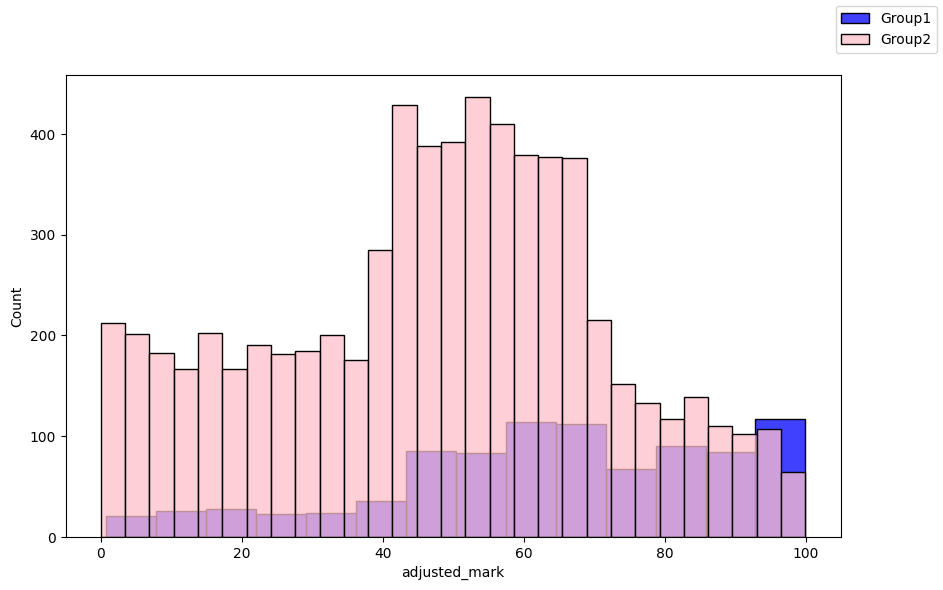

In [78]:
# Divide students into 2 groups
group1 = inter_df[inter_df.Group==1]

group2 = inter_df[inter_df.Group==2]

# Draw distribution of adjusted_mark for both groups
fig = plt.figure(figsize=(10,6))
sns.histplot(group1.adjusted_mark, color='blue')
sns.histplot(group2.adjusted_mark, color='pink')

fig.legend(labels=['Group1','Group2'])
plt.show()

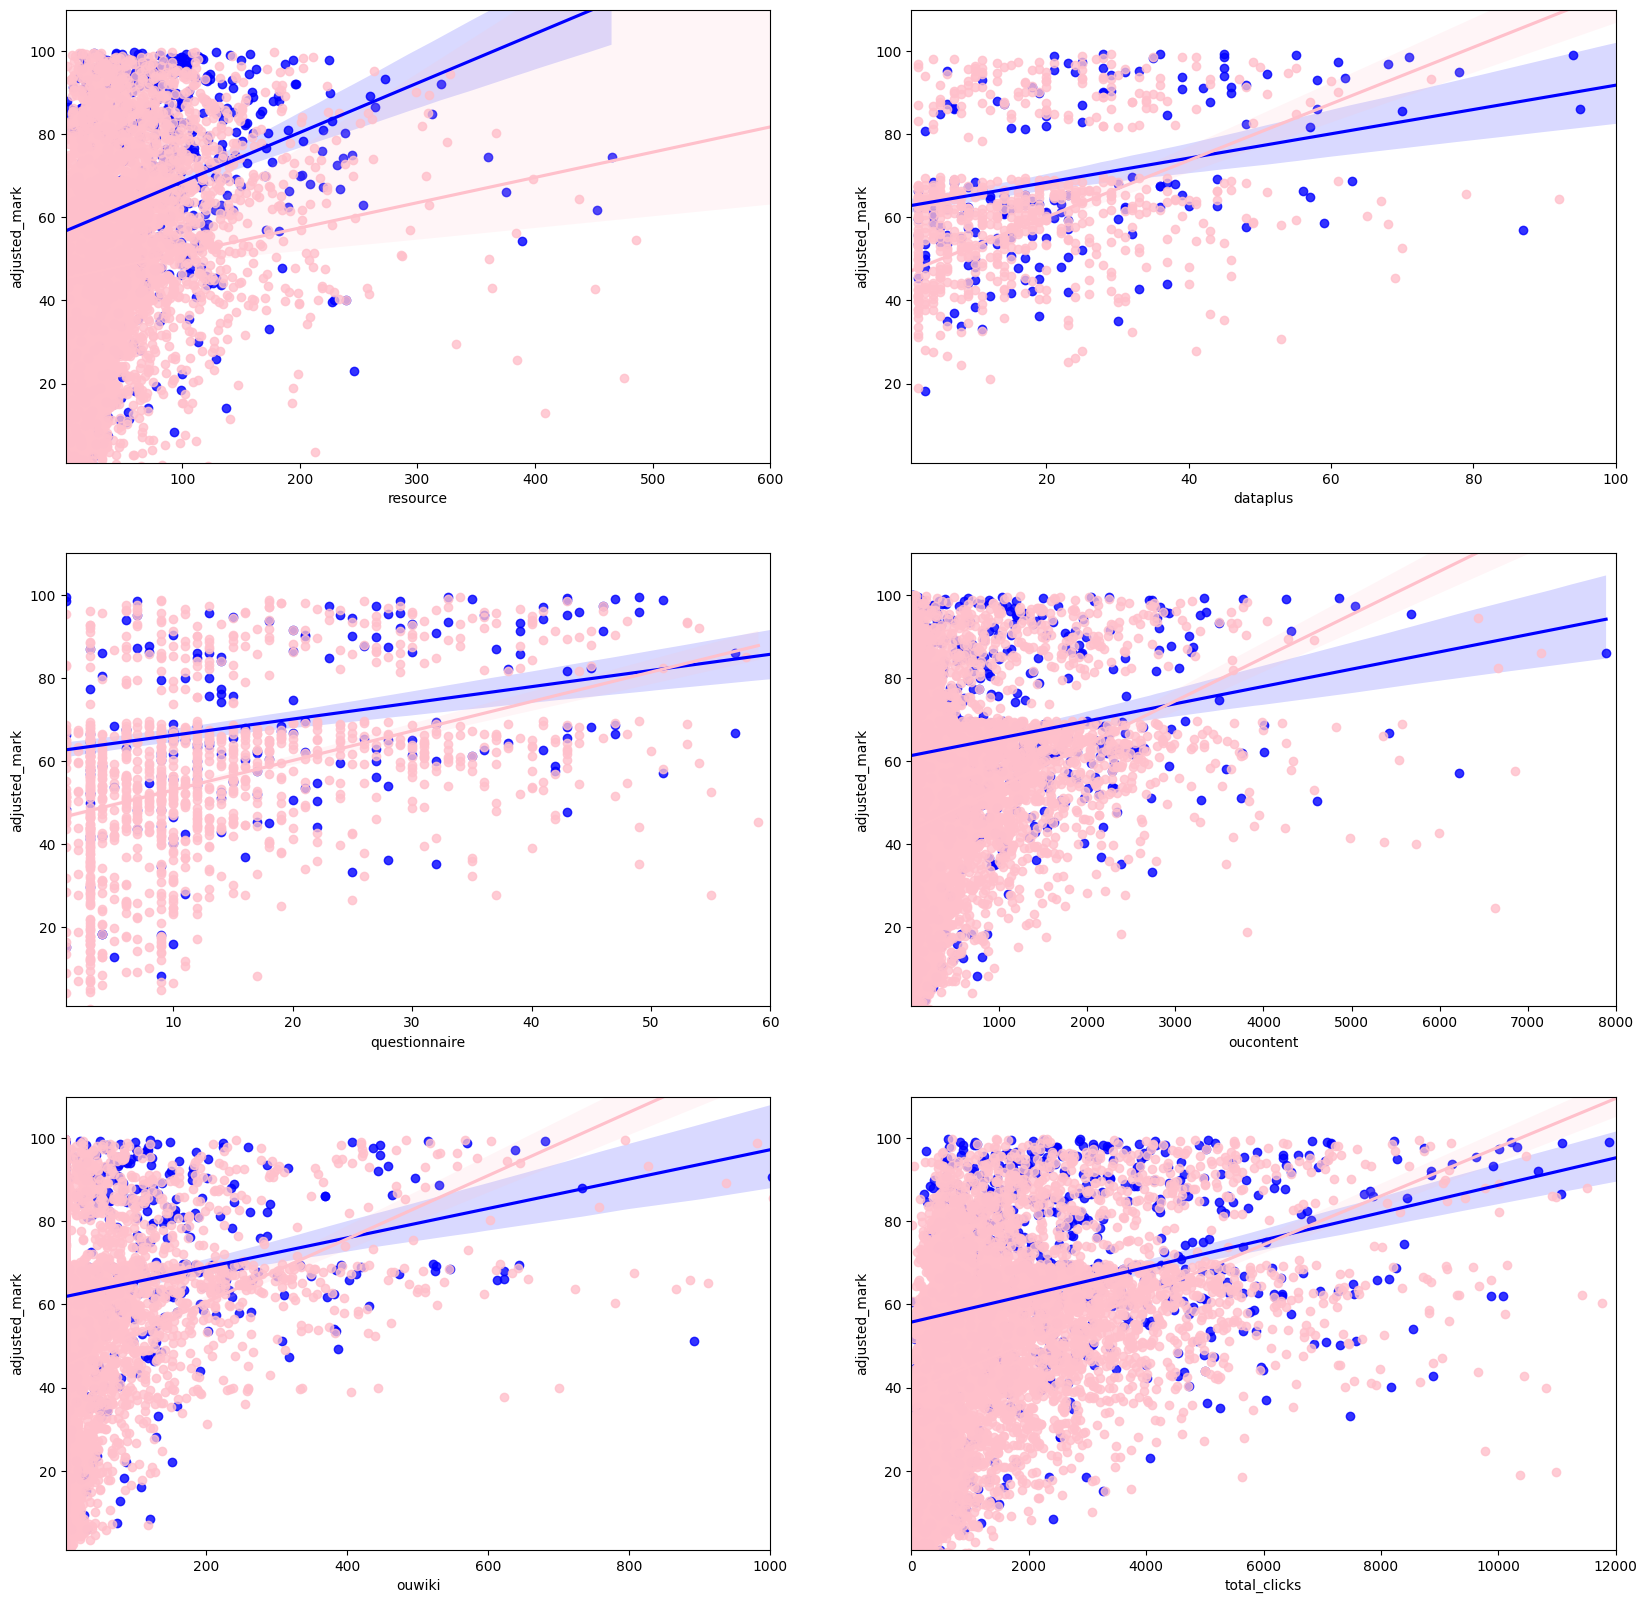

In [79]:

# list of tuples that uniquely identifies each element of group1 and group2
g1_key_tuple=list(zip(group1.code_module,group1.code_presentation,group1.id_student))
g2_key_tuple=list(zip(group2.code_module,group2.code_presentation,group2.id_student))


# Difference of correlation values between group1 and group2 on correlation values of adjusted mark with other variables
abs(inter_df[inter_df.Group=="1"].corr()["adjusted_mark"]\
    - inter_df[inter_df.Group=="2"].corr()["adjusted_mark"]).sort_values().tail(10)

# Create a figure
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

# Add first subplot to figure
ax = fig.add_subplot(3, 2, 1)
ax1 = sns.regplot(x="resource", y="adjusted_mark" , data=group1, label="Group 1",ci=95, ax=ax, color='blue')
ax1 = sns.regplot(x="resource", y="adjusted_mark" , data=group2, label= "GRoup 2",ci=95, ax=ax, color='pink')
ax1.set_xlim(1,600)
ax1.set_ylim(1,110)

# Add second subplot to figure
ax = fig.add_subplot(3, 2, 2)
ax2 = sns.regplot(x="dataplus", y="adjusted_mark" , data=group1, label="Group 1",ci=95, ax=ax, color='blue')
ax2 = sns.regplot(x="dataplus", y="adjusted_mark" , data=group2, label= "Group 2",ci=95, ax=ax, color='pink')
ax2.set_xlim(1,100)
ax2.set_ylim(1,110)

# Add third subplot to figure
ax = fig.add_subplot(3, 2, 3)
ax3 = sns.regplot(x="questionnaire", y="adjusted_mark" , data=group1, label="Group 1",ci=95, ax=ax, color='blue')
ax3 = sns.regplot(x="questionnaire", y="adjusted_mark" , data=group2, label= "GRoup 2",ci=95, ax=ax, color='pink')
ax3.set_xlim(1,60)
ax3.set_ylim(1,110)


# Add fourth subplot to figure
ax = fig.add_subplot(3, 2, 4)
ax4 = sns.regplot(x="oucontent", y="adjusted_mark" , data=group1, label="Group 1",ci=95, ax=ax, color='blue')
ax4 = sns.regplot(x="oucontent", y="adjusted_mark" , data=group2, label= "GRoup 2",ci=95, ax=ax, color='pink')
ax4.set_xlim(1,8000)
ax4.set_ylim(1,110)

# Add fiveth subplot to figure
ax = fig.add_subplot(3, 2, 5)
ax5 = sns.regplot(x="ouwiki", y="adjusted_mark" , data=group1, label="Group 1",ci=95, ax=ax, color='blue')
ax5 = sns.regplot(x="ouwiki", y="adjusted_mark" , data=group2, label= "GRoup 2",ci=95, ax=ax, color='pink')
ax5.set_xlim(1,1000)
ax5.set_ylim(1,110)

# Add sixth subplot to figure
ax = fig.add_subplot(3, 2, 6)
ax6 = sns.regplot(x="total_clicks", y="adjusted_mark" , data=group1, label="Group 1",ci=95, ax=ax, color='blue')
ax6 = sns.regplot(x="total_clicks", y="adjusted_mark" , data=group2, label= "GRoup 2",ci=95, ax=ax, color='pink')
ax6.set_xlim(0,12000)
ax6.set_ylim(1,110)


plt.show()